In [1]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 10.4 MB/s eta 0:00:00


In [2]:
!pip install scikit-plot

In [3]:
pip install scipy==1.9.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.4/33.4 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 20.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
stumpy 1.13.0 requires scipy>=1.10, but you have scipy 1.9.3 which is incompatible.
jaxlib 0.5.1 requires scipy>=1.11.1, but you have scipy 1.9.3 which is incompatible.
xarray-einstats 0.9.0 requires scipy>=1.11, but you have scipy 1.9.3 which is incompatible.
cvxpy 1.6.5 requires scipy>

In [1]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 5.2 MB/s eta 0:00:00


In [2]:
!pip install pandas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy.stats import skew

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import scikitplot as skplt

import optuna

import tensorflow as tf

# **Loading Data**

In [4]:
data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(f'Number of rows: {data.shape[0]}')
print(f'Number of columns: {data.shape[1]}')

Number of rows: 7043
Number of columns: 21


In [5]:
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


# **Data Preprocessing**

In [6]:
data.drop('customerID', axis=1, inplace= True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [7]:
print(data['SeniorCitizen'].unique())
print(data['TotalCharges'].nunique())

[0 1]
6531


In [8]:
data['SeniorCitizen'] = data['SeniorCitizen'].astype(str)
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.NaN) # This column had missing values represented by ' '. I noticed it when I tried converting it to float and it gave me an error that it could not convert string to float
data['TotalCharges'] = data['TotalCharges'].astype(float)
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median()) # Fill the missing values with median

In [9]:
unique_values = {column: list(data[column].unique()) for column in data.select_dtypes(object).columns}
for key, value in unique_values.items():
    print(f'{key} : {value}')

gender : ['Female', 'Male']
SeniorCitizen : ['0', '1']
Partner : ['Yes', 'No']
Dependents : ['No', 'Yes']
PhoneService : ['No', 'Yes']
MultipleLines : ['No phone service', 'No', 'Yes']
InternetService : ['DSL', 'Fiber optic', 'No']
OnlineSecurity : ['No', 'Yes', 'No internet service']
OnlineBackup : ['Yes', 'No', 'No internet service']
DeviceProtection : ['No', 'Yes', 'No internet service']
TechSupport : ['No', 'Yes', 'No internet service']
StreamingTV : ['No', 'Yes', 'No internet service']
StreamingMovies : ['No', 'Yes', 'No internet service']
Contract : ['Month-to-month', 'One year', 'Two year']
PaperlessBilling : ['Yes', 'No']
PaymentMethod : ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
Churn : ['No', 'Yes']


In [10]:
data['MultipleLines'] = data['MultipleLines'].replace('No phone service', 'No')
data[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
      'TechSupport', 'StreamingTV', 'StreamingMovies']] = data[['OnlineSecurity', 'OnlineBackup',
                                                                'DeviceProtection', 'TechSupport',
                                                                'StreamingTV', 'StreamingMovies']].replace('No internet service', 'No')

In [11]:
unique_values = {column: list(data[column].unique()) for column in data.select_dtypes(object).columns}
for key, value in unique_values.items():
    print(f'{key} : {value}')

gender : ['Female', 'Male']
SeniorCitizen : ['0', '1']
Partner : ['Yes', 'No']
Dependents : ['No', 'Yes']
PhoneService : ['No', 'Yes']
MultipleLines : ['No', 'Yes']
InternetService : ['DSL', 'Fiber optic', 'No']
OnlineSecurity : ['No', 'Yes']
OnlineBackup : ['Yes', 'No']
DeviceProtection : ['No', 'Yes']
TechSupport : ['No', 'Yes']
StreamingTV : ['No', 'Yes']
StreamingMovies : ['No', 'Yes']
Contract : ['Month-to-month', 'One year', 'Two year']
PaperlessBilling : ['Yes', 'No']
PaymentMethod : ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
Churn : ['No', 'Yes']


In [12]:
data['tenure'].value_counts(ascending= False)
# 0 appears 11 times, and minimum contract possible is a month-to-month contract, so I will count it as missing value and will fill it with median

,count
tenure,
1,613
72,362
2,238
3,200
4,176
...,...
28,57
39,56
44,51


In [13]:
data['tenure']  = data['tenure'].replace(0, np.NaN)
data['tenure'] = data['tenure'].fillna(data['tenure'].median())

# **EDA**

In [14]:
data['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


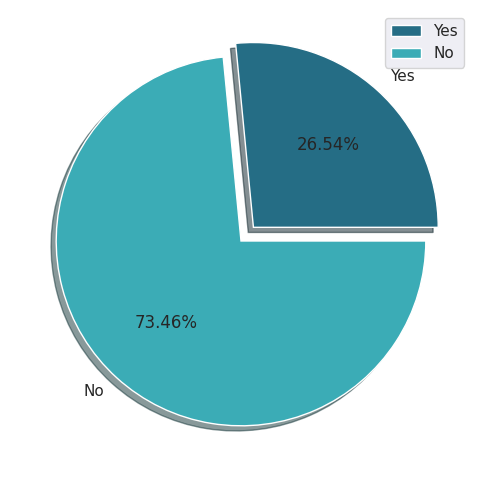

In [15]:
plt.figure(figsize= (10, 6))
data_pie  = [1869 , 5174]
labels = ["Yes", "No"]
explode = [0.1, 0]
plt.pie(data_pie ,labels= labels , explode = explode , autopct="%1.2f%%", shadow= True, colors= ['#256D85', '#3BACB6'])
plt.legend()
plt.show()

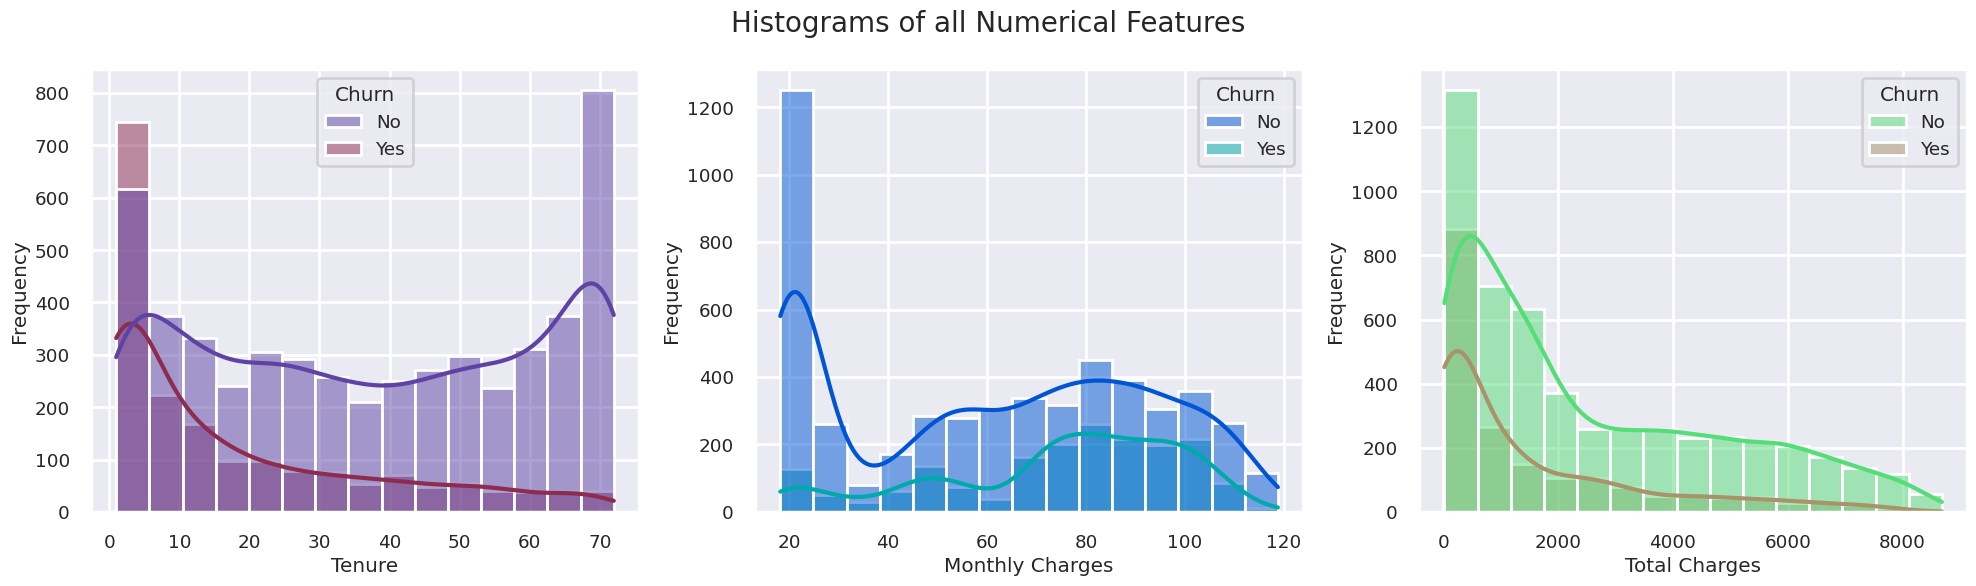

In [16]:
sns.set_context('poster', font_scale= 0.6)
fig, ax  = plt.subplots(1, 3, figsize=(20, 6))

plt.suptitle('Histograms of all Numerical Features', fontsize = 20)

ax1 = sns.histplot(x = data['tenure'],color= 'teal', hue= data['Churn'], ax= ax[0], bins= 15, kde= True, palette= 'twilight')
ax1.set(xlabel= 'Tenure', ylabel= 'Frequency')

ax2 = sns.histplot(x = data['MonthlyCharges'], color= 'teal', hue= data['Churn'], ax= ax[1], bins= 15, kde= True, palette= 'winter')
ax2.set(xlabel= 'Monthly Charges', ylabel= 'Frequency')

ax3 = sns.histplot(x = data['TotalCharges'], color= 'teal', hue= data['Churn'], ax= ax[2], bins= 15, kde= True, palette= 'terrain')
ax3.set(xlabel= 'Total Charges', ylabel= 'Frequency')

plt.tight_layout()
plt.show()

<ipython-input-17-b0784529df82>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.boxplot(y = data['tenure'], x= data['Churn'], ax= ax[0], palette= 'summer')
<ipython-input-17-b0784529df82>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.boxplot(y = data['MonthlyCharges'], x= data['Churn'], ax= ax[1], palette= 'Blues')
<ipython-input-17-b0784529df82>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax3 = sns.boxplot(y = data['TotalCharges'], x= data['Churn'], ax= ax[2], palette= 'bone')


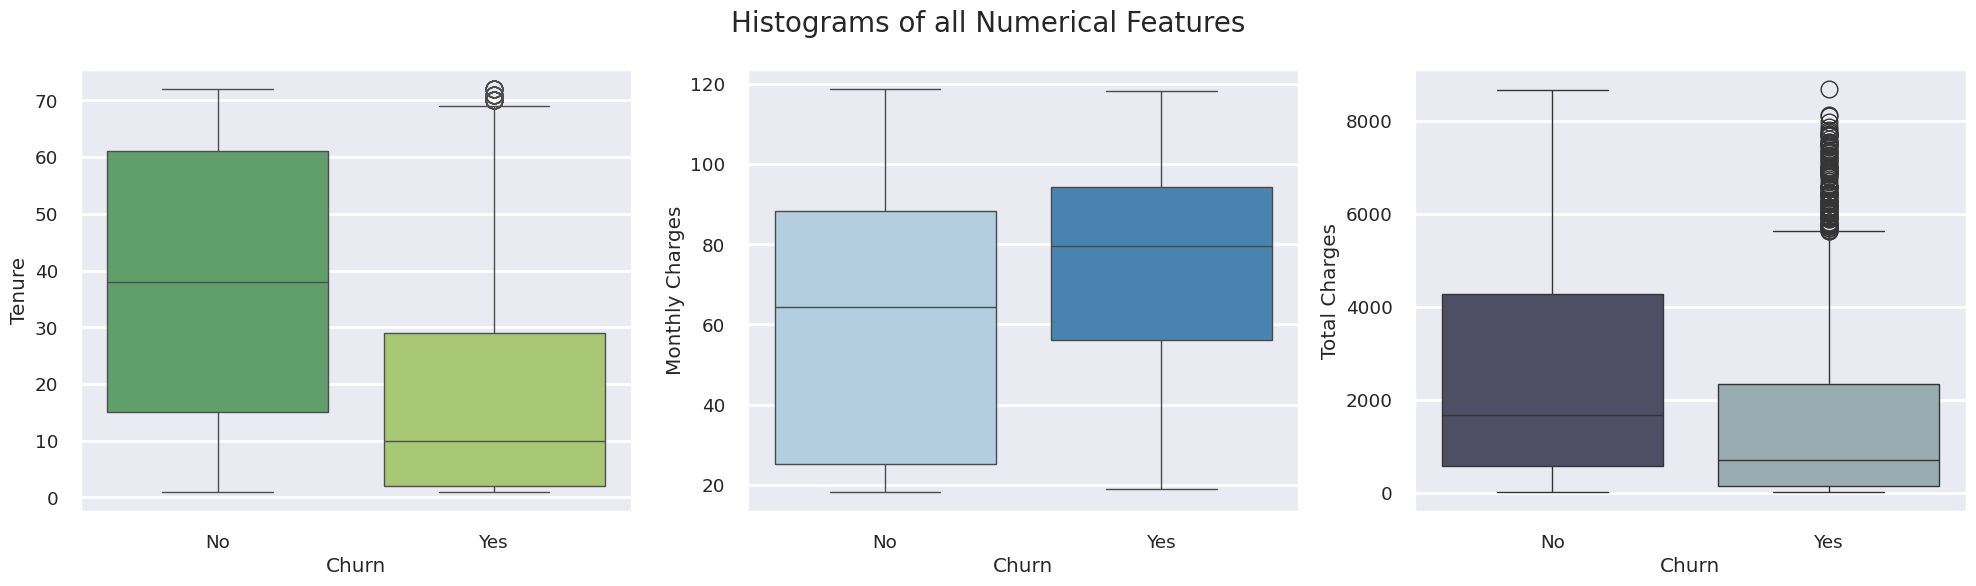

In [17]:
sns.set_context('poster', font_scale= 0.6)
fig, ax  = plt.subplots(1, 3, figsize=(20, 6))

plt.suptitle('Histograms of all Numerical Features', fontsize = 20)

ax1 = sns.boxplot(y = data['tenure'], x= data['Churn'], ax= ax[0], palette= 'summer')
ax1.set(xlabel= 'Churn', ylabel= 'Tenure')

ax2 = sns.boxplot(y = data['MonthlyCharges'], x= data['Churn'], ax= ax[1], palette= 'Blues')
ax2.set(xlabel= 'Churn', ylabel= 'Monthly Charges')

ax3 = sns.boxplot(y = data['TotalCharges'], x= data['Churn'], ax= ax[2], palette= 'bone')
ax3.set(xlabel= 'Churn', ylabel= 'Total Charges')

plt.tight_layout()
plt.show()

<Axes: >

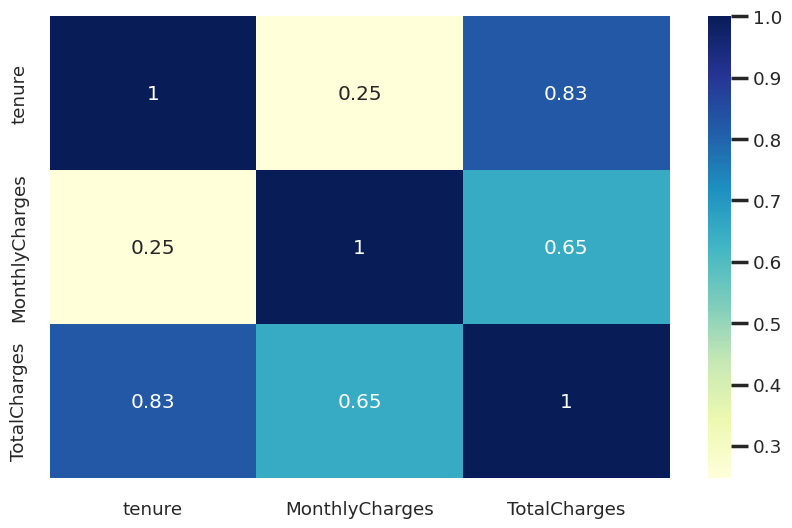

In [18]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.select_dtypes(include='number').corr(), cmap='YlGnBu', annot=True)

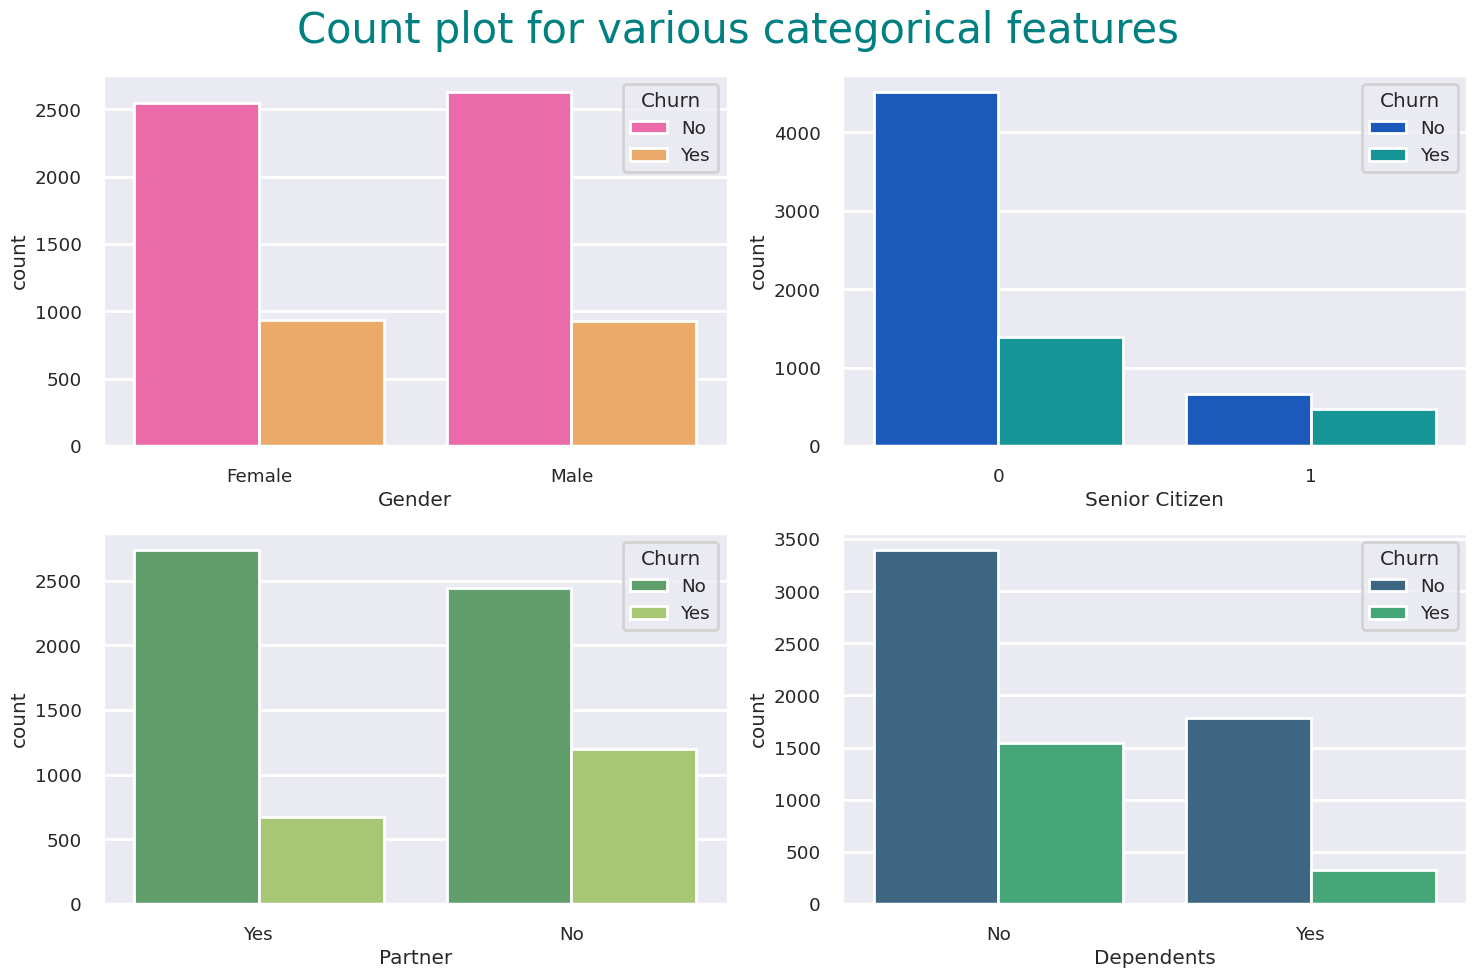

In [19]:
fig, ax = plt.subplots(2, 2, figsize = (15, 10))
plt.suptitle('Count plot for various categorical features', fontsize = 30, color= 'teal')

ax1 = sns.countplot(x ='gender', data= data, hue= 'Churn', ax= ax[0, 0], palette= 'spring')
ax1.set(xlabel = 'Gender')

ax2 = sns.countplot(x ='SeniorCitizen', data= data, hue= 'Churn', ax= ax[0, 1], palette= 'winter')
ax2.set(xlabel = 'Senior Citizen')

ax3 = sns.countplot(x ='Partner', data= data, hue= 'Churn', ax= ax[1, 0], palette= 'summer')
ax3.set(xlabel = 'Partner')

ax4 = sns.countplot(x ='Dependents', data= data, hue= 'Churn', ax= ax[1, 1], palette= 'viridis')
ax4.set(xlabel = 'Dependents')

plt.tight_layout()
plt.show()

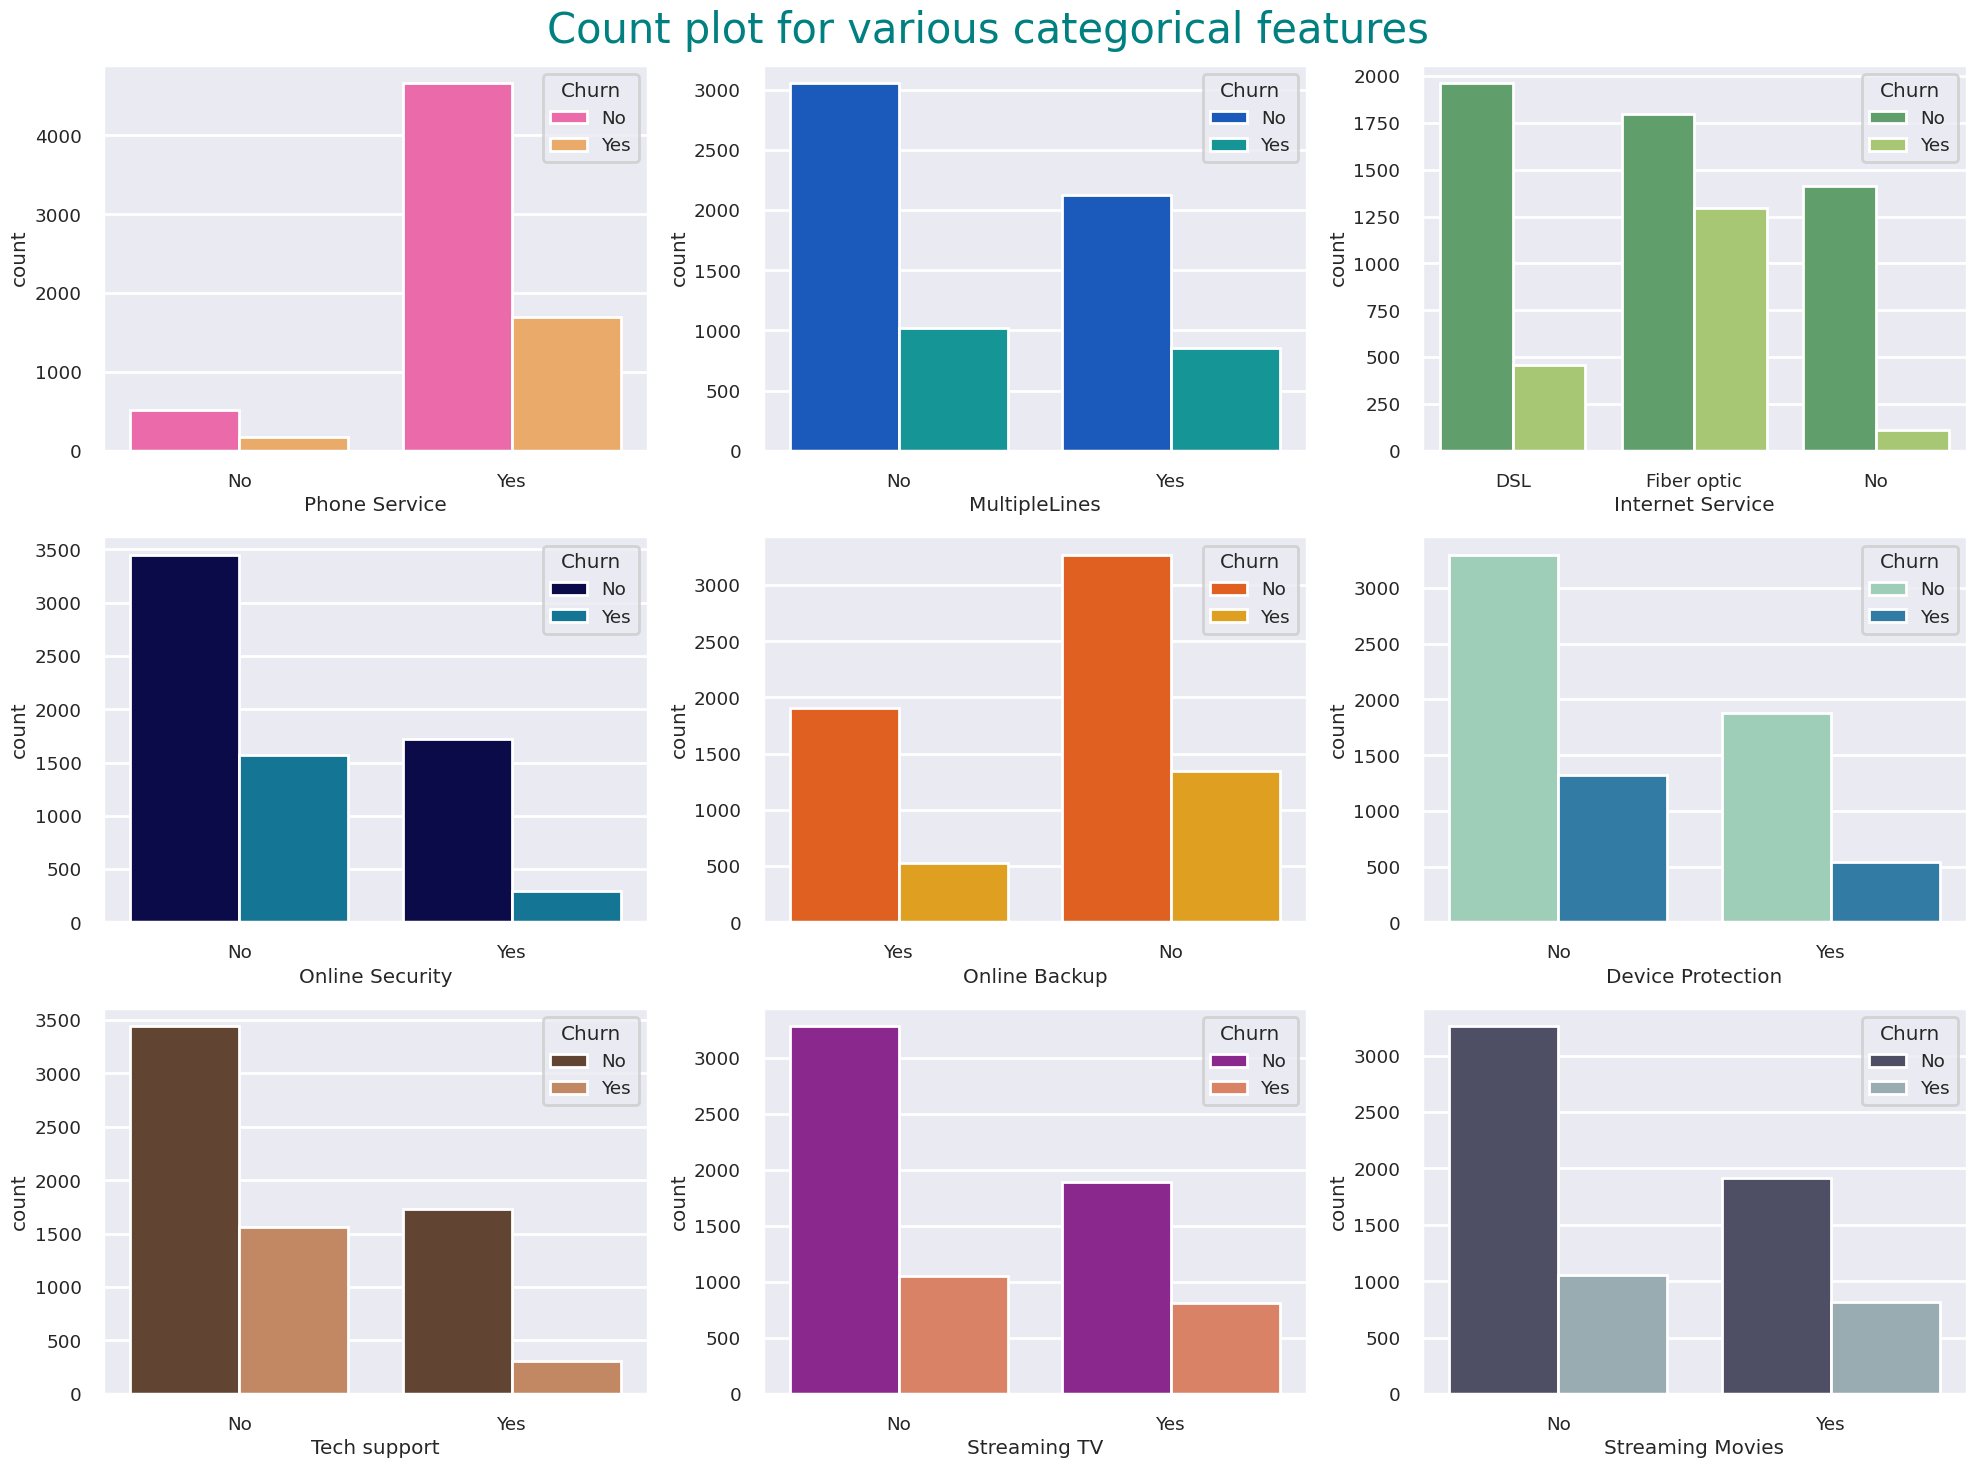

In [20]:
fig, ax = plt.subplots(3, 3, figsize = (20, 15))

plt.suptitle('Count plot for various categorical features', fontsize = 30, color= 'teal')

ax1 = sns.countplot(x ='PhoneService', data= data, hue= 'Churn', ax= ax[0, 0], palette= 'spring')
ax1.set(xlabel = 'Phone Service')

ax2 = sns.countplot(x ='MultipleLines', data= data, hue= 'Churn', ax= ax[0, 1], palette= 'winter')
ax2.set(xlabel = 'MultipleLines')

ax3 = sns.countplot(x ='InternetService', data= data, hue= 'Churn', ax= ax[0, 2], palette= 'summer')
ax3.set(xlabel = 'Internet Service')

ax4 = sns.countplot(x ='OnlineSecurity', data= data, hue= 'Churn', ax= ax[1, 0], palette= 'ocean')
ax4.set(xlabel = 'Online Security')

ax5 = sns.countplot(x ='OnlineBackup', data= data, hue= 'Churn', ax= ax[1, 1], palette= 'autumn')
ax5.set(xlabel = 'Online Backup')

ax6 = sns.countplot(x ='DeviceProtection', data= data, hue= 'Churn', ax= ax[1, 2], palette= 'YlGnBu')
ax6.set(xlabel = 'Device Protection')

ax7 = sns.countplot(x ='TechSupport', data= data, hue= 'Churn', ax= ax[2, 0], palette= 'copper')
ax7.set(xlabel = 'Tech support')

ax8 = sns.countplot(x ='StreamingTV', data= data, hue= 'Churn', ax= ax[2, 1], palette= 'plasma')
ax8.set(xlabel = 'Streaming TV')

ax9 = sns.countplot(x ='StreamingMovies', data= data, hue= 'Churn', ax= ax[2, 2], palette= 'bone')
ax9.set(xlabel = 'Streaming Movies')

plt.tight_layout()
plt.show()


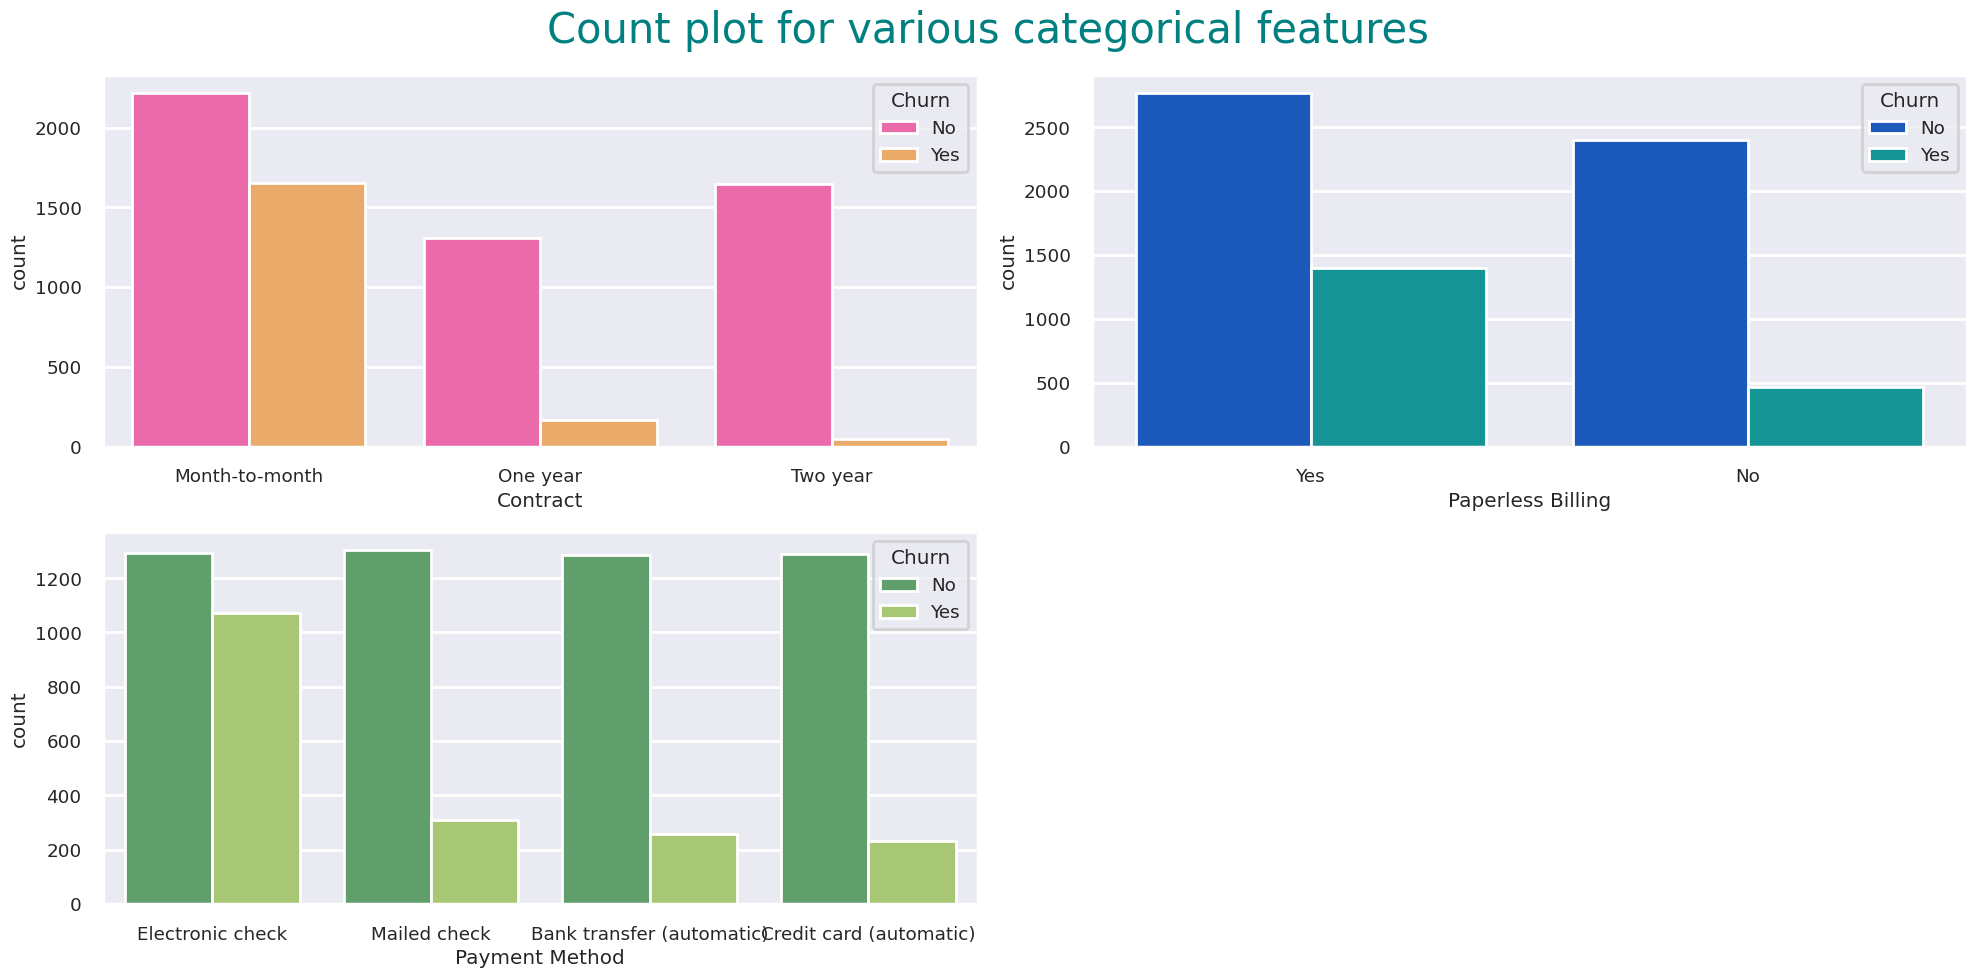

In [21]:
fig, ax = plt.subplots(2, 2, figsize = (20, 10))
ax[1, 1].axis('off')

plt.suptitle('Count plot for various categorical features', fontsize = 30, color= 'teal')

ax1 = sns.countplot(x ='Contract', data= data, hue= 'Churn', ax= ax[0, 0], palette= 'spring')
ax1.set(xlabel = 'Contract')

ax2 = sns.countplot(x ='PaperlessBilling', data= data, hue= 'Churn', ax= ax[0, 1], palette= 'winter')
ax2.set(xlabel = 'Paperless Billing')

ax3 = sns.countplot(x ='PaymentMethod', data= data, hue= 'Churn', ax= ax[1, 0], palette= 'summer')
ax3.set(xlabel = 'Payment Method')

plt.tight_layout()
plt.show()

# **Missing Values**

In [22]:
data.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


# **Checking For Skewness**

In [23]:
skew_df = pd.DataFrame(data.select_dtypes(np.number).columns, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: skew(data[feature]))
skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
skew_df

,Feature,Skew,Absolute Skew
0,tenure,0.238505,0.238505
1,MonthlyCharges,-0.220477,0.220477
2,TotalCharges,0.963584,0.963584


In [24]:
data['TotalCharges'] = np.log(data['TotalCharges'])

# **Encoding**

In [25]:
binary_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

le = LabelEncoder()
for column in binary_columns:
    data[column] = le.fit_transform(data[column])

In [26]:
dummies_payment = pd.get_dummies(data['PaymentMethod'], drop_first= True)
data = pd.concat([data, dummies_payment], axis=1)
data.drop('PaymentMethod',axis =1 , inplace= True)

In [27]:
internet_ordering = ['No', 'DSL', 'Fiber optic']
contract_ordering = ['Month-to-month', 'One year', 'Two year']

data['InternetService'] = data['InternetService'].apply(lambda x: internet_ordering.index(x))
data['Contract'] = data['Contract'].apply(lambda x: contract_ordering.index(x))

# **Scaling**

In [28]:
X = data.drop('Churn', axis= 1)
y = data['Churn']

In [29]:
sc = StandardScaler()
X = sc.fit_transform(X)

# **Splitting**

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, stratify= y, random_state= 42)

In [31]:
print(y_train.value_counts())
print(y_test.value_counts())

Churn
0    4139
1    1495
Name: count, dtype: int64
Churn
0    1035
1     374
Name: count, dtype: int64


# **Modelling**

In [32]:
models = {
    'logistic reg' : LogisticRegression(),
    'xgboost' : XGBClassifier(), #
    'catboost' : CatBoostClassifier(verbose=0),
    'lightbgm' : LGBMClassifier(),
    'gradient boost' : GradientBoostingClassifier(),
    'naive bayes' : GaussianNB(),
    'random forest' : RandomForestClassifier() #
}

In [33]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f'{name} trained')

logistic reg trained
xgboost trained
catboost trained
[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001765 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 639
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265353 -> initscore=-1.018328
[LightGBM] [Info] Start training from score -1.018328


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


lightbgm trained
gradient boost trained
naive bayes trained
random forest trained


# **Evaluation**

In [34]:
results = {}

kf = KFold(n_splits= 10)

for name, model in models.items():
    result = cross_val_score(model, X_train, y_train, scoring= 'roc_auc', cv= kf)
    results[name] = result

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1348, number of negative: 3722
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001093 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 639
[LightGBM] [Info] Number of data points in the train set: 5070, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265878 -> initscore=-1.015639
[LightGBM] [Info] Start training from score -1.015639
[LightGBM] [Info] Number of positive: 1351, number of negative: 3719
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001020 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 639
[LightGBM] [Info] Number of data points in the train set: 5070, number of used features: 21
[LightGBM] [Info] [binary:

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1363, number of negative: 3707
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 639
[LightGBM] [Info] Number of data points in the train set: 5070, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.268836 -> initscore=-1.000535
[LightGBM] [Info] Start training from score -1.000535
[LightGBM] [Info] Number of positive: 1343, number of negative: 3727
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001215 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 639
[LightGBM] [Info] Number of data points in the train set: 5070, number of used features: 21
[LightGBM] [Info] [binary:

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1342, number of negative: 3729
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001106 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 639
[LightGBM] [Info] Number of data points in the train set: 5071, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.264642 -> initscore=-1.021979
[LightGBM] [Info] Start training from score -1.021979
[LightGBM] [Info] Number of positive: 1327, number of negative: 3744
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 639
[LightGBM] [Info] Number of data points in the train set: 5071, number of used features: 21
[LightGBM] [Info] [binary:

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1340, number of negative: 3731
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001057 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 639
[LightGBM] [Info] Number of data points in the train set: 5071, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.264248 -> initscore=-1.024007
[LightGBM] [Info] Start training from score -1.024007
[LightGBM] [Info] Number of positive: 1346, number of negative: 3725
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 639
[LightGBM] [Info] Number of data points in the train set: 5071, number of used features: 21
[LightGBM] [Info] [binary:

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1344, number of negative: 3727
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001216 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 639
[LightGBM] [Info] Number of data points in the train set: 5071, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265036 -> initscore=-1.019953
[LightGBM] [Info] Start training from score -1.019953
[LightGBM] [Info] Number of positive: 1351, number of negative: 3720
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001011 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 639
[LightGBM] [Info] Number of data points in the train set: 5071, number of used features: 21
[LightGBM] [Info] [binary:

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [35]:
for name, result in results.items():
    print("----------------")
    print(f'{name} : {np.mean(result)}')

----------------
logistic reg : 0.8508786257696552
----------------
xgboost : 0.8205718013642068
----------------
catboost : 0.8410796939951648
----------------
lightbgm : 0.8360262959501084
----------------
gradient boost : 0.8451299887758463
----------------
naive bayes : 0.8338557401940768
----------------
random forest : 0.8247107495010981


In [36]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# Define scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': 'roc_auc'
}

results = {}
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# models is assumed to be a dictionary like {'Random Forest': RandomForestClassifier(), ...}
for name, model in models.items():
    scores = cross_validate(model, X_train, y_train, cv=kf, scoring=scoring)
    results[name] = {metric: np.mean(scores[f'test_{metric}']) for metric in scoring.keys()}

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1343, number of negative: 3727
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001130 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 639
[LightGBM] [Info] Number of data points in the train set: 5070, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.264892 -> initscore=-1.020698
[LightGBM] [Info] Start training from score -1.020698
[LightGBM] [Info] Number of positive: 1359, number of negative: 3711
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001023 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 639
[LightGBM] [Info] Number of data points in the train set: 5070, number of used features: 21
[LightGBM] [Info] [binary:

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Number of positive: 1357, number of negative: 3713
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001074 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 639
[LightGBM] [Info] Number of data points in the train set: 5070, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267653 -> initscore=-1.006564
[LightGBM] [Info] Start training from score -1.006564
[LightGBM] [Info] Number of positive: 1357, number of negative: 3713
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001228 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 639
[LightGBM] [Info] Number of data points in the train set: 5070, number of used features: 21
[LightGBM] [Info] [binary:

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Number of positive: 1341, number of negative: 3730
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000830 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 639
[LightGBM] [Info] Number of data points in the train set: 5071, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.264445 -> initscore=-1.022993
[LightGBM] [Info] Start training from score -1.022993
[LightGBM] [Info] Number of positive: 1330, number of negative: 3741
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001037 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 639
[LightGBM] [Info] Number of data points in the train set: 5071, number of used features: 21
[LightGBM] [Info] [binary:

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Number of positive: 1347, number of negative: 3724
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001269 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 639
[LightGBM] [Info] Number of data points in the train set: 5071, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265628 -> initscore=-1.016918
[LightGBM] [Info] Start training from score -1.016918
[LightGBM] [Info] Number of positive: 1342, number of negative: 3729
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001050 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 639
[LightGBM] [Info] Number of data points in the train set: 5071, number of used features: 21
[LightGBM] [Info] [binary:

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Number of positive: 1337, number of negative: 3734
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001151 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 639
[LightGBM] [Info] Number of data points in the train set: 5071, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.263656 -> initscore=-1.027052
[LightGBM] [Info] Start training from score -1.027052
[LightGBM] [Info] Number of positive: 1342, number of negative: 3729
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001036 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 639
[LightGBM] [Info] Number of data points in the train set: 5071, number of used features: 21
[LightGBM] [Info] [binary:

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [37]:
# Display the results
for name, metrics in results.items():
    print("----------------")
    print(f'{name} Evaluation Metrics:')
    for metric, score in metrics.items():
        print(f'{metric.capitalize()}: {score:.4f}')

----------------
logistic reg Evaluation Metrics:
Accuracy: 0.8085
Precision: 0.6714
Recall: 0.5452
F1: 0.6009
Roc_auc: 0.8514
----------------
xgboost Evaluation Metrics:
Accuracy: 0.7808
Precision: 0.6046
Recall: 0.5027
F1: 0.5481
Roc_auc: 0.8211
----------------
catboost Evaluation Metrics:
Accuracy: 0.8012
Precision: 0.6616
Recall: 0.5155
F1: 0.5784
Roc_auc: 0.8428
----------------
lightbgm Evaluation Metrics:
Accuracy: 0.7971
Precision: 0.6452
Recall: 0.5214
F1: 0.5758
Roc_auc: 0.8349
----------------
gradient boost Evaluation Metrics:
Accuracy: 0.8026
Precision: 0.6614
Recall: 0.5234
F1: 0.5834
Roc_auc: 0.8455
----------------
naive bayes Evaluation Metrics:
Accuracy: 0.7666
Precision: 0.5455
Recall: 0.7239
F1: 0.6218
Roc_auc: 0.8347
----------------
random forest Evaluation Metrics:
Accuracy: 0.7902
Precision: 0.6351
Recall: 0.4866
F1: 0.5506
Roc_auc: 0.8248


<ipython-input-38-260032ef9583>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(model_names))


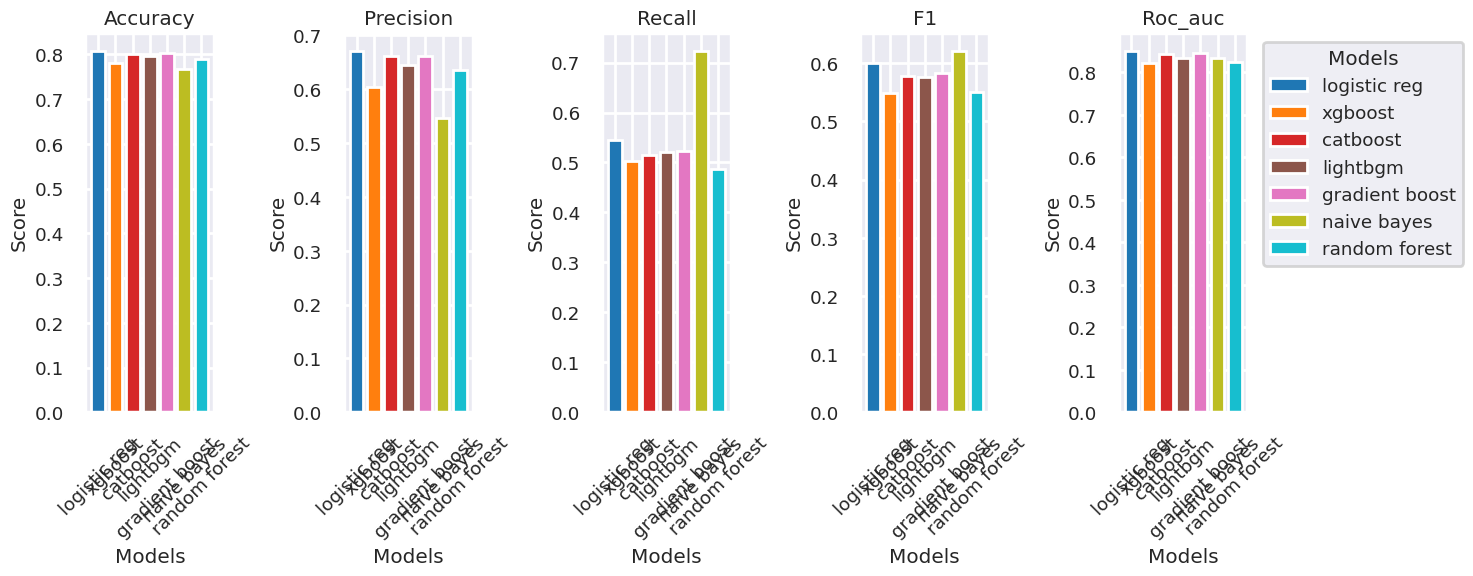

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'results' is already populated from your code above
model_names = list(results.keys())
metrics = list(results[model_names[0]].keys())  # Assuming all models have the same metrics

# Generate a color map for different models
colors = plt.cm.get_cmap('tab10', len(model_names))

# Create a figure with subplots (one for each metric)
fig, axes = plt.subplots(1, len(metrics), figsize=(15, 6))

# Iterate over each metric and create a subplot for each
for i, metric in enumerate(metrics):
    # Plot bars with different colors for each model
    bars = axes[i].bar(model_names, [results[model][metric] for model in model_names],
                       color=[colors(j) for j in range(len(model_names))])

    # Set title and labels
    axes[i].set_title(f'{metric.capitalize()}')
    axes[i].set_xlabel('Models')
    axes[i].set_ylabel('Score')

    # Rotate x-axis labels for readability
    axes[i].tick_params(axis='x', rotation=45)

# Add a legend with the model names
axes[i].legend(bars, model_names, title='Models', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout for better readability
plt.tight_layout()
plt.show()


logistic reg Performance:
Accuracy: 0.8034
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.53      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409

ROC AUC: 0.8489

xgboost Performance:
Accuracy: 0.7885
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1035
           1       0.61      0.55      0.58       374

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.78      1409

ROC AUC: 0.8264

catboost Performance:
Accuracy: 0.8055
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1  

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


gradient boost Performance:
Accuracy: 0.8006
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.66      0.51      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

ROC AUC: 0.8441

naive bayes Performance:
Accuracy: 0.7644
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1035
           1       0.54      0.72      0.62       374

    accuracy                           0.76      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79      0.76      0.77      1409

ROC AUC: 0.8307

random forest Performance:
Accuracy: 0.7850
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
   

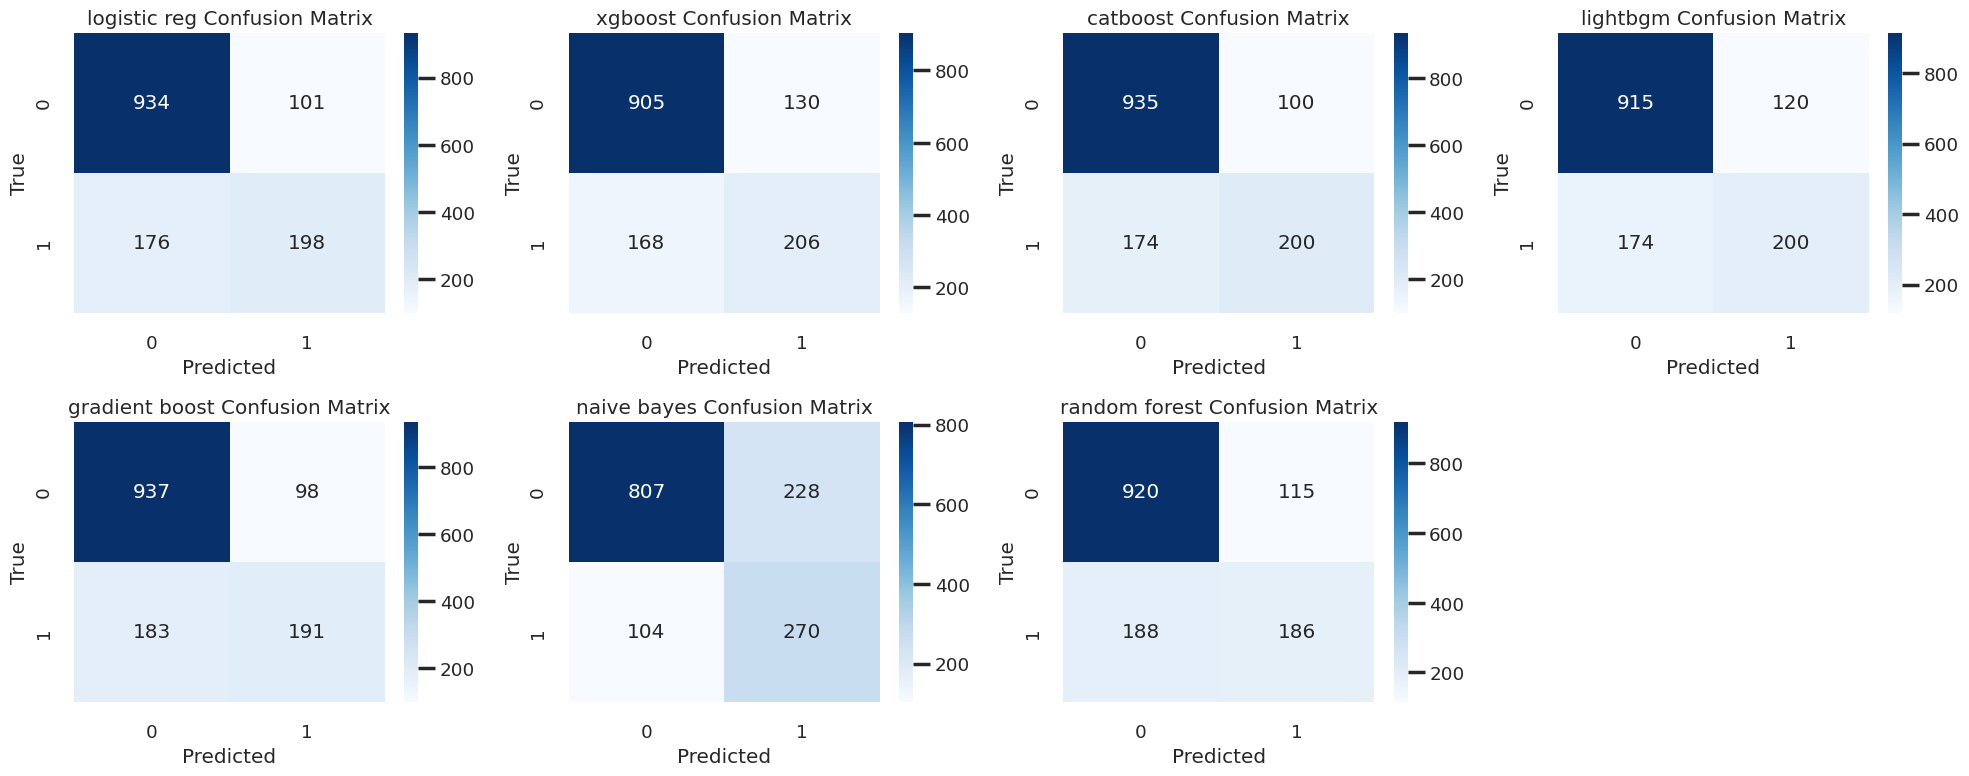

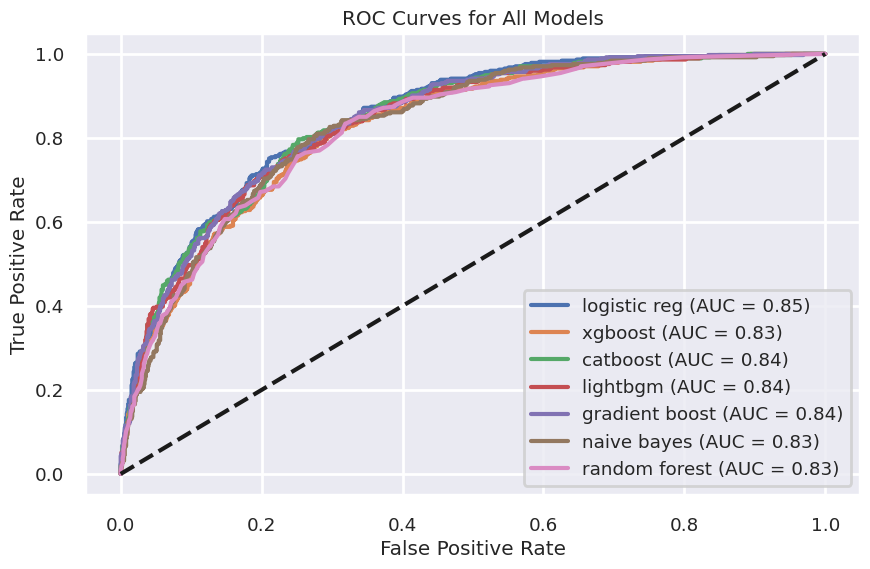

<Figure size 640x480 with 0 Axes>

In [39]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.inspection import permutation_importance

# Train models, predict, and evaluate
predictions = {}
probs = {}
for name, model in models.items():
    # Train
    model.fit(X_train, y_train)
    # Predict
    predictions[name] = model.predict(X_test)
    probs[name] = model.predict_proba(X_test)[:, 1]
    # Evaluate
    print(f"{name} Performance:")
    print(f"Accuracy: {accuracy_score(y_test, predictions[name]):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, predictions[name]))
    print(f"ROC AUC: {roc_auc_score(y_test, probs[name]):.4f}\n")

# Plot confusion matrices
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
axes = axes.flatten()
for idx, (name, preds) in enumerate(predictions.items()):
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f'{name} Confusion Matrix')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('True')
# Remove empty subplot (7 models, 8 slots)
axes[-1].axis('off')
plt.tight_layout()
plt.show()

# Plot ROC curves
plt.figure(figsize=(10, 6))
for name, prob in probs.items():
    fpr, tpr, _ = roc_curve(y_test, prob)
    auc_score = roc_auc_score(y_test, prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend()
plt.show()

# Remove empty subplot (7 models, 8 slots)
axes[-1].axis('off')
plt.tight_layout()
plt.show()


# **Feature Importance**

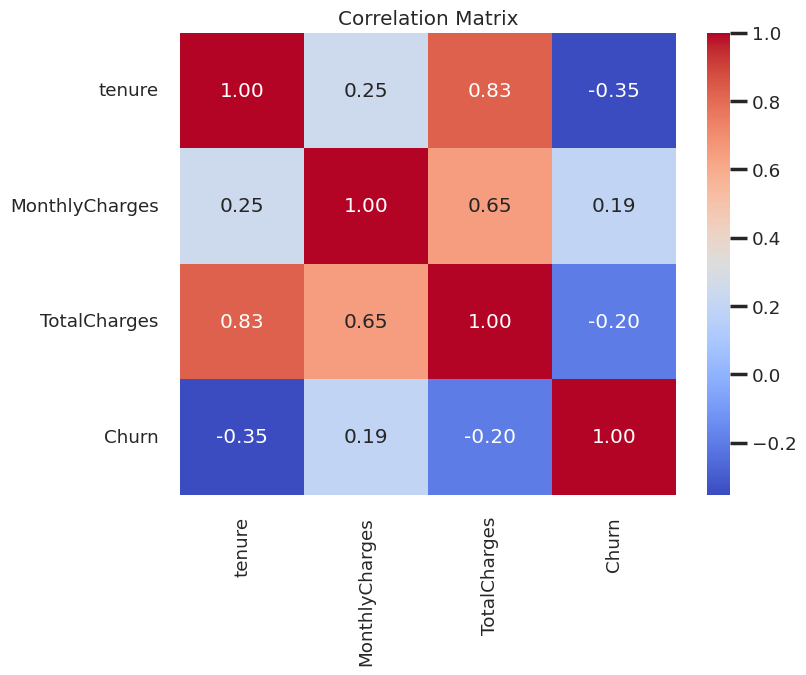

Correlation with Churn:
Churn             1.000000
MonthlyCharges    0.193356
TotalCharges     -0.199484
tenure           -0.352229
Name: Churn, dtype: float64


<ipython-input-40-8fb55d1efb6c>:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)


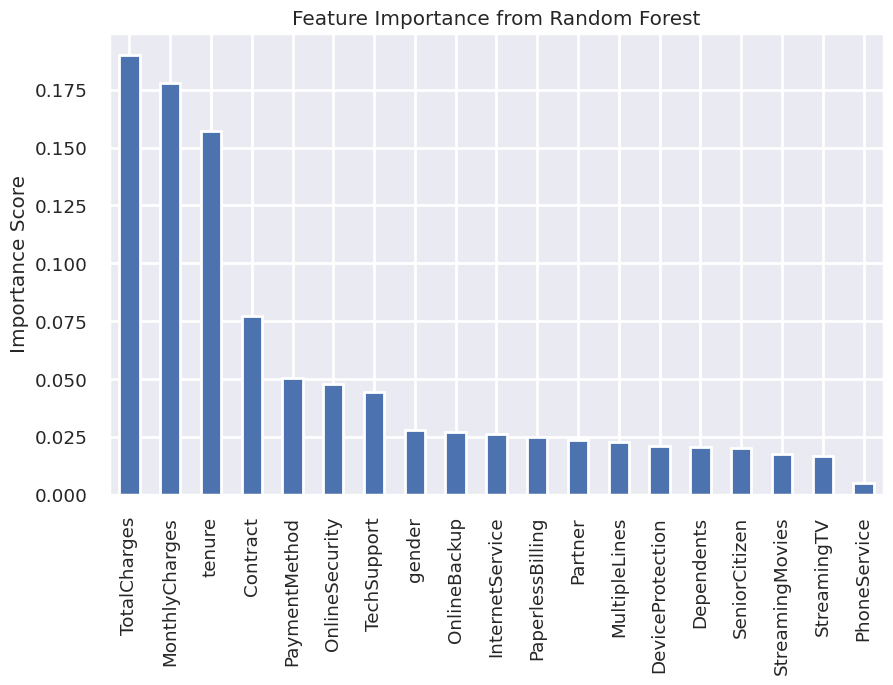

Feature Importances:
TotalCharges        0.190022
MonthlyCharges      0.177682
tenure              0.157228
Contract            0.077324
PaymentMethod       0.050392
OnlineSecurity      0.047675
TechSupport         0.044250
gender              0.028209
OnlineBackup        0.027190
InternetService     0.026254
PaperlessBilling    0.024919
Partner             0.023813
MultipleLines       0.023011
DeviceProtection    0.021065
Dependents          0.020654
SeniorCitizen       0.020374
StreamingMovies     0.017798
StreamingTV         0.016839
PhoneService        0.005301
dtype: float64


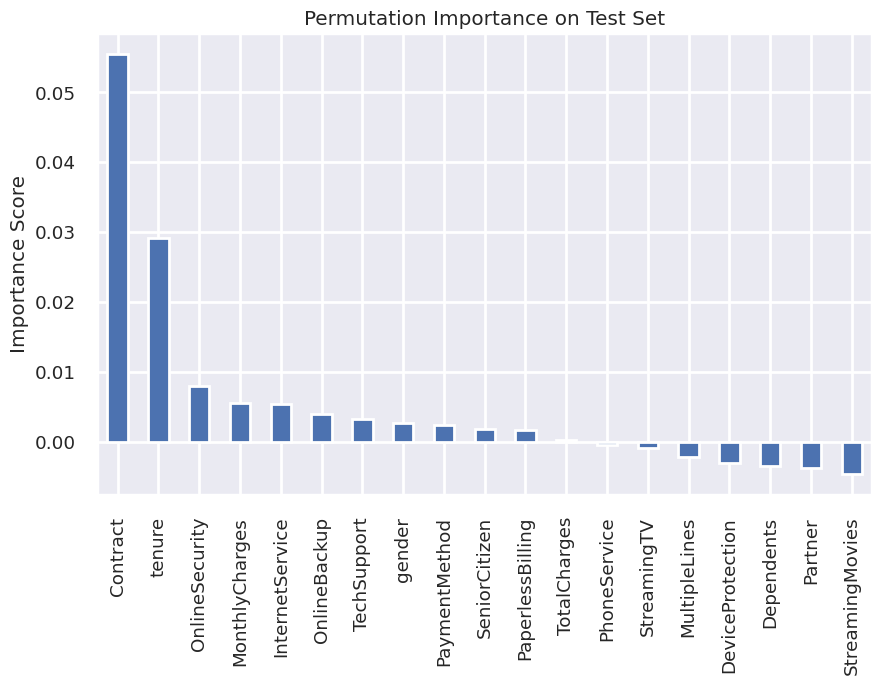

Permutation Importances:
Contract            0.055459
tenure              0.029087
OnlineSecurity      0.008025
MonthlyCharges      0.005556
InternetService     0.005328
OnlineBackup        0.003985
TechSupport         0.003249
gender              0.002613
PaymentMethod       0.002364
SeniorCitizen       0.001781
PaperlessBilling    0.001654
TotalCharges        0.000245
PhoneService       -0.000437
StreamingTV        -0.000918
MultipleLines      -0.002140
DeviceProtection   -0.003070
Dependents         -0.003471
Partner            -0.003733
StreamingMovies    -0.004598
dtype: float64


In [40]:
# 1. Correlation Analysis (Numerical Features)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.inspection import permutation_importance

# Load the dataset
data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Convert Churn to binary (0/1)
data['Churn'] = data['Churn'].map({'No': 0, 'Yes': 1})

# Select numerical columns
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
# Convert TotalCharges to numeric, handling errors
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Compute correlation matrix
corr = data[numerical_cols + ['Churn']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Print correlations with Churn
print("Correlation with Churn:")
print(corr['Churn'].sort_values(ascending=False))

# 2. Feature Importance from Tree-Based Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# # Load and preprocess data
data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# # Convert TotalCharges to numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)

# Encode categorical variables
le = LabelEncoder()
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod']
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

# Define features and target
X = data.drop(['Churn', 'customerID'], axis=1)  # Drop customerID as it’s not predictive
y = data['Churn'].map({'No': 0, 'Yes': 1})

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
importances.plot(kind='bar')
plt.title('Feature Importance from Random Forest')
plt.ylabel('Importance Score')
plt.show()

# Print importances
print("Feature Importances:")
print(importances)

# 3. Permutation Importance (Model-Agnostic)
from sklearn.inspection import permutation_importance
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

# Assume your trained model is 'model' (from your notebook)
# If not, train a simple model for demonstration
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Compute permutation importance
perm_importance = permutation_importance(model, X_test, y_test, scoring='roc_auc', n_repeats=10, random_state=42)

# Plot
importances = pd.Series(perm_importance.importances_mean, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
importances.plot(kind='bar')
plt.title('Permutation Importance on Test Set')
plt.ylabel('Importance Score')
plt.show()

# Print importances
print("Permutation Importances:")
print(importances)

# **Predict & Validation**

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Performance:
Accuracy: 0.8162
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

ROC AUC: 0.8615

Gradient Boosting Performance:
Accuracy: 0.8041
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.67      0.52      0.58       373

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.80      1409

ROC AUC: 0.8580

XGBoost Performance:
Accuracy: 0.7821
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      103

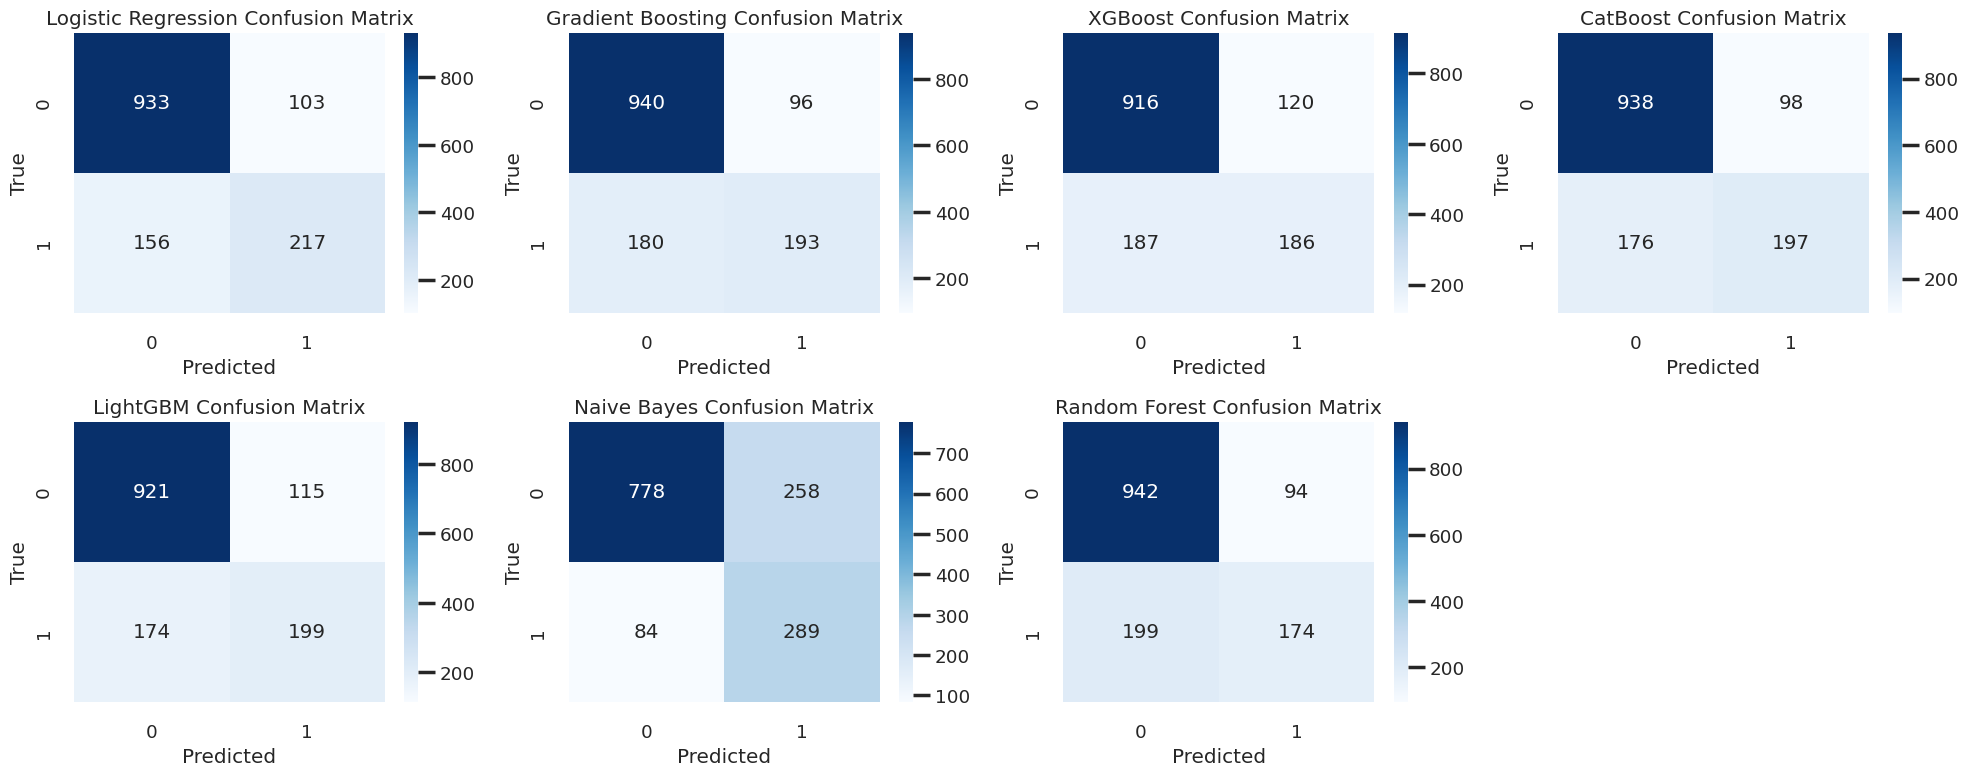

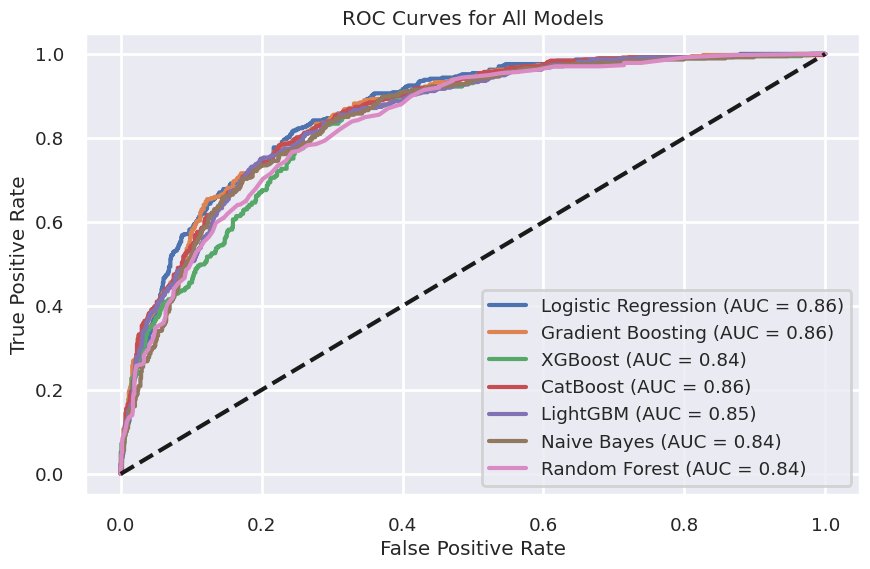

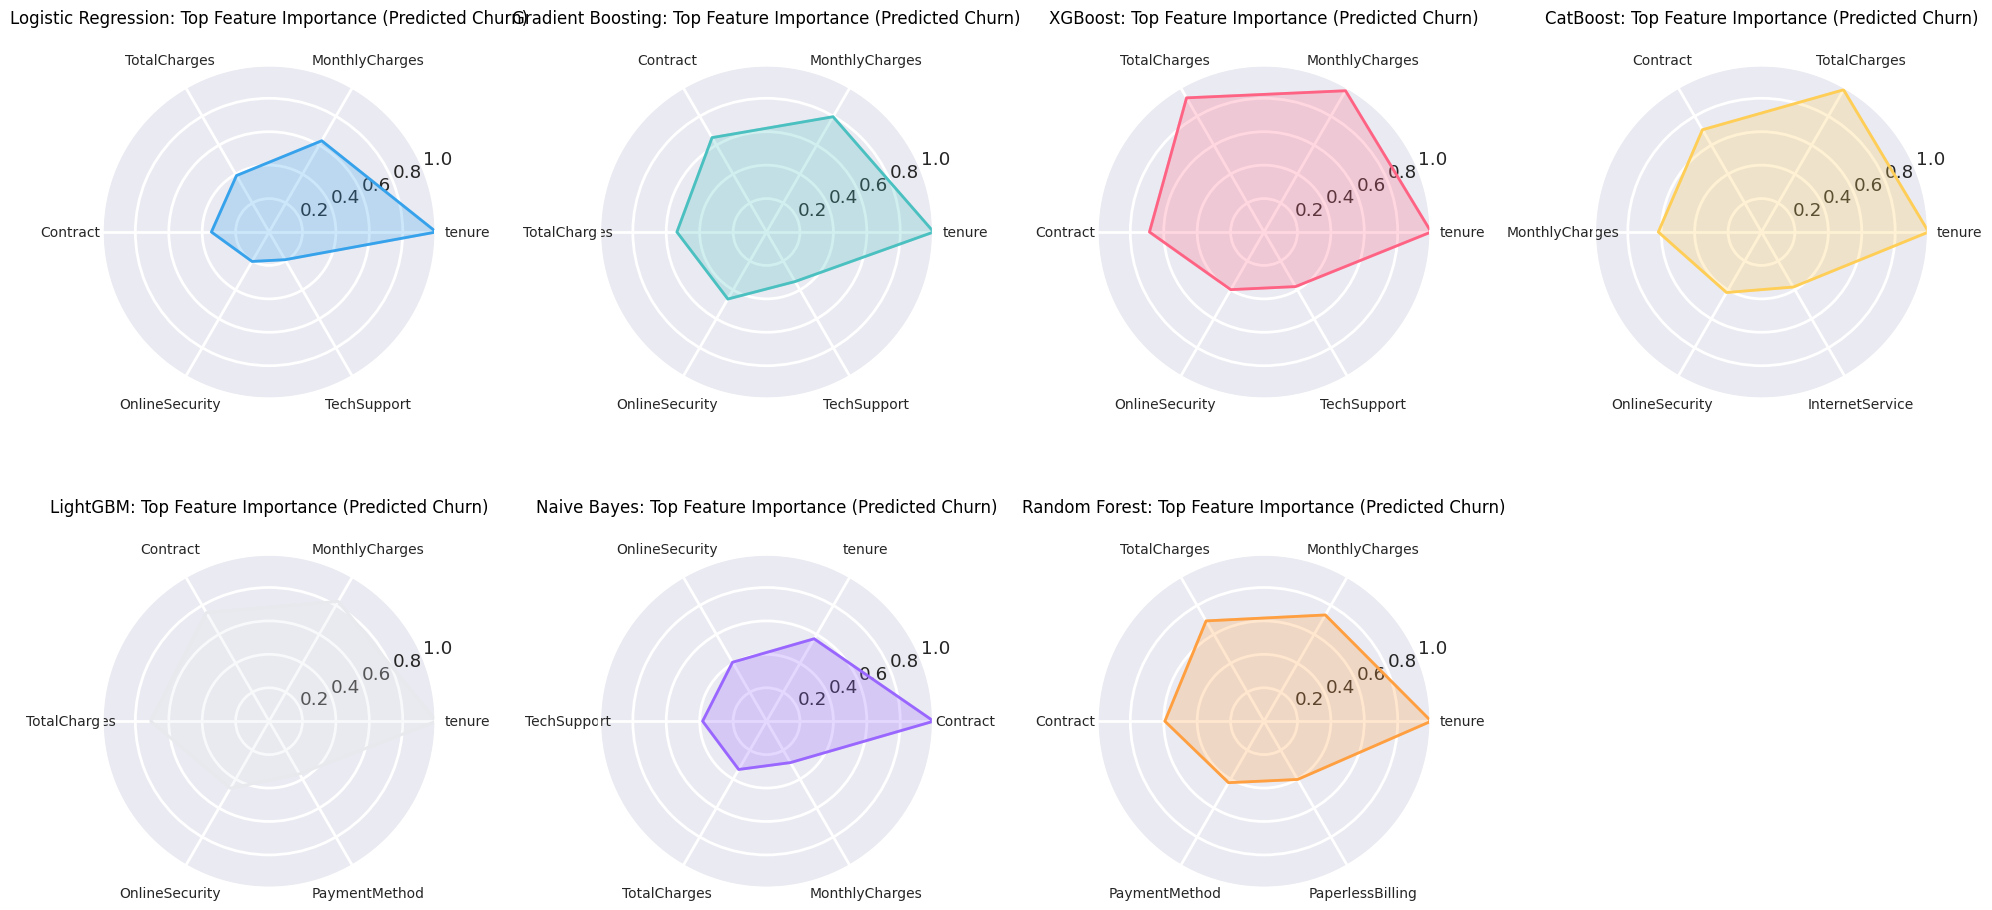


Logistic Regression Top Features (Based on Predicted Churn):
tenure            1.000000
MonthlyCharges    0.630293
TotalCharges      0.389883
Contract          0.344984
OnlineSecurity    0.203467
TechSupport       0.191532
dtype: float64

Gradient Boosting Top Features (Based on Predicted Churn):
tenure            1.000000
MonthlyCharges    0.796343
Contract          0.652108
TotalCharges      0.536313
OnlineSecurity    0.463179
TechSupport       0.342306
dtype: float64

XGBoost Top Features (Based on Predicted Churn):
tenure            1.000000
MonthlyCharges    0.975952
TotalCharges      0.926854
Contract          0.685371
OnlineSecurity    0.398297
TechSupport       0.377255
dtype: float64

CatBoost Top Features (Based on Predicted Churn):
tenure             1.000000
TotalCharges       0.982528
Contract           0.706465
MonthlyCharges     0.617356
OnlineSecurity     0.418171
InternetService    0.380315
dtype: float64

LightGBM Top Features (Based on Predicted Churn):
tenure      

In [41]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss'),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0),
    'LightGBM': LGBMClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Train models, predict, and evaluate
predictions = {}
probs = {}
for name, model in models.items():
    # Train
    model.fit(X_train, y_train)
    # Predict
    predictions[name] = model.predict(X_test)
    probs[name] = model.predict_proba(X_test)[:, 1]
    # Evaluate
    print(f"{name} Performance:")
    print(f"Accuracy: {accuracy_score(y_test, predictions[name]):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, predictions[name]))
    print(f"ROC AUC: {roc_auc_score(y_test, probs[name]):.4f}\n")

# Plot confusion matrices
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
axes = axes.flatten()
for idx, (name, preds) in enumerate(predictions.items()):
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f'{name} Confusion Matrix')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('True')
# Remove empty subplot (7 models, 8 slots)
axes[-1].axis('off')
plt.tight_layout()
plt.show()

# Plot ROC curves
plt.figure(figsize=(10, 6))
for name, prob in probs.items():
    fpr, tpr, _ = roc_curve(y_test, prob)
    auc_score = roc_auc_score(y_test, prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend()
plt.show()

# Function to create radar chart with Matplotlib
def plot_radar_chart(labels, values, title, color, ax):
    num_vars = len(labels)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]
    values = values + values[:1]
    ax.fill(angles, values, color=color, alpha=0.25)
    ax.plot(angles, values, color=color, linewidth=2)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=10)
    ax.set_title(title, size=12, color='black', y=1.1)
    ax.grid(True)
    ax.set_ylim(0, 1)

# Compute feature importance using permutation importance based on predicted values
feature_importance = {}
top_n = 6
for name, model in models.items():
    # Compute permutation importance using predicted labels
    perm_importance = permutation_importance(model, X_test, predictions[name], n_repeats=10, random_state=42, scoring='accuracy')
    # Normalize importance scores to [0, 1]
    importance = perm_importance.importances_mean
    importance = importance / importance.max() if importance.max() > 0 else importance
    feature_importance[name] = pd.Series(importance, index=X.columns).sort_values(ascending=False)

# Plot radar charts
fig, axes = plt.subplots(2, 4, figsize=(20, 10), subplot_kw=dict(projection='polar'))
axes = axes.flatten()
colors = ['#36A2EB', '#4BC0C0', '#FF6384', '#FFCE56', '#E7E9ED', '#9966FF', '#FF9F40']
for idx, (name, importance) in enumerate(feature_importance.items()):
    top_features = importance.head(top_n)
    plot_radar_chart(
        labels=top_features.index.tolist(),
        values=top_features.values.tolist(),
        title=f'{name}: Top Feature Importance (Predicted Churn)',
        color=colors[idx],
        ax=axes[idx]
    )
# Remove empty subplot (7 models, 8 slots)
axes[-1].axis('off')
plt.tight_layout()
plt.show()

# Print feature importance
for name, importance in feature_importance.items():
    print(f"\n{name} Top Features (Based on Predicted Churn):")
    print(importance.head(top_n))

# Add predicted values to X_test for sample output (after predictions)
X_test["Predicted Logistic"] = predictions["Logistic Regression"]
X_test["Predicted Gradient"] = predictions["Gradient Boosting"]
X_test["Actual"] = y_test
print(X_test[["Actual", "Predicted Logistic", "Predicted Gradient"]].head(10))

# **Rules for Churn**

Logistic Regression Performance:
Accuracy: 0.8169
ROC AUC: 0.8614
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409


Gradient Boosting Performance:
Accuracy: 0.8041
ROC AUC: 0.8582
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.67      0.52      0.58       373

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.80      1409


XGBoost Performance:
Accuracy: 0.7821
ROC AUC: 0.8361
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88   

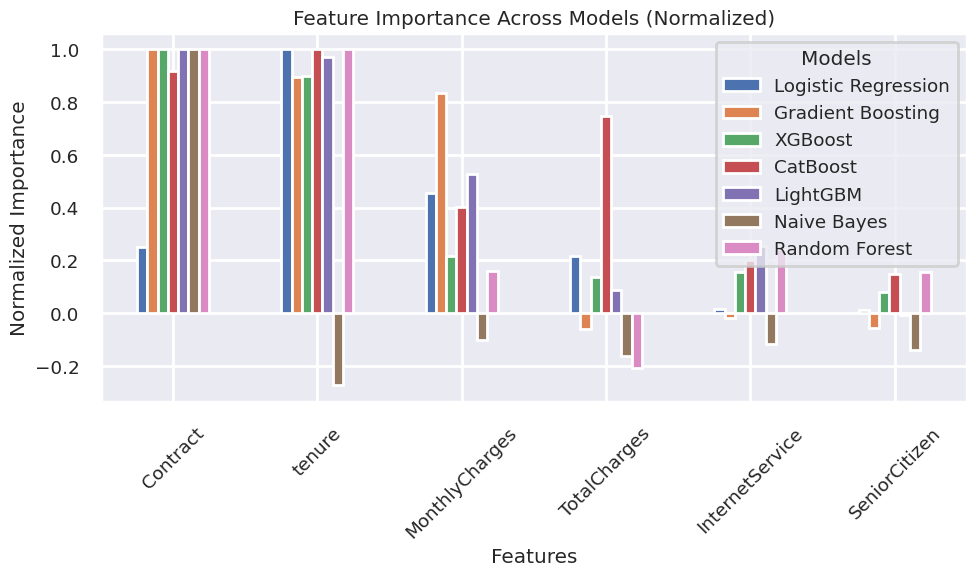

Decision Tree Performance:
Accuracy: 0.7892
ROC AUC: 0.8220
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1036
           1       0.68      0.38      0.49       373

    accuracy                           0.79      1409
   macro avg       0.74      0.66      0.68      1409
weighted avg       0.77      0.79      0.77      1409


Performance Comparison:
                     Accuracy   ROC AUC  Decision Tree
Logistic Regression  0.816891  0.861414            NaN
Gradient Boosting    0.804116  0.858160            NaN
XGBoost              0.782115  0.836057            NaN
CatBoost             0.805536  0.855579            NaN
LightGBM             0.803407  0.849016            NaN
Naive Bayes          0.757984  0.842888            NaN
Random Forest        0.792051  0.836902            NaN

Classification Rules for Churn (Scaled):
|--- Contract <= 0.50
|   |--- MonthlyCharges <= 0.12
|   |   |--- tenure <= -1.18


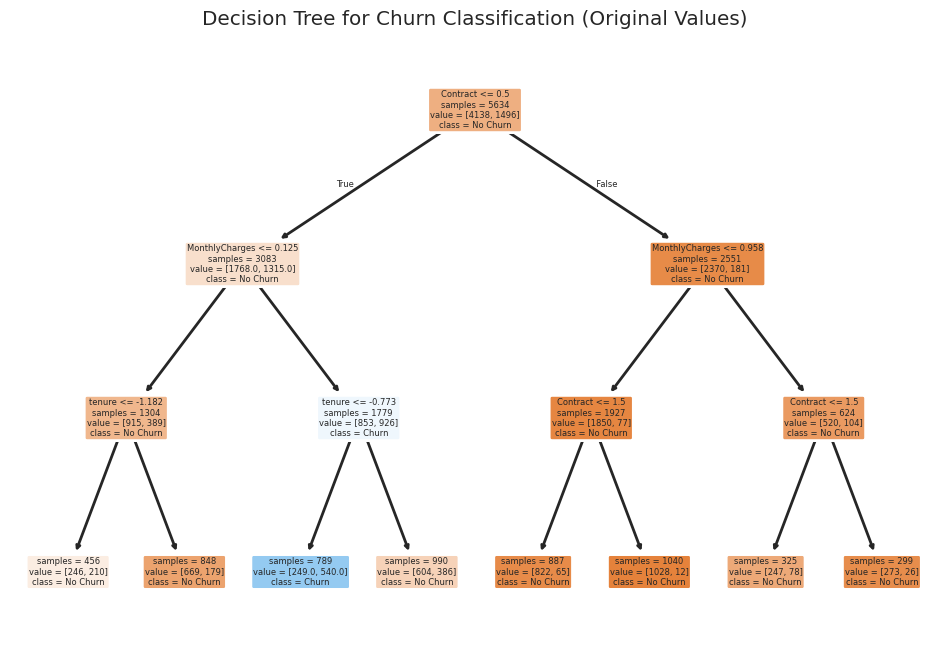


Graphviz tree with original values saved as 'churn_decision_tree_original.png'

Top Features and Their Importance:
                 Logistic Regression  Gradient Boosting   XGBoost  CatBoost  \
Contract                    0.249396           1.000000  1.000000  0.919689   
tenure                      1.000000           0.893939  0.900000  1.000000   
MonthlyCharges              0.454710           0.835498  0.217647  0.401554   
TotalCharges                0.216787          -0.060606  0.135294  0.748705   
InternetService             0.016304          -0.019481  0.155882  0.199482   
SeniorCitizen               0.012681          -0.056277  0.079412  0.147668   

                 LightGBM  Naive Bayes  Random Forest  
Contract         1.000000     1.000000       1.000000  
tenure           0.971370    -0.273438       1.000000  
MonthlyCharges   0.527607    -0.101563       0.159609  
TotalCharges     0.085890    -0.164063      -0.208469  
InternetService  0.253579    -0.117188       0.244

In [42]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.inspection import permutation_importance
import graphviz
from sklearn import tree

# Encode categorical variables
le = LabelEncoder()
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod']
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

# Convert Churn to binary
data['Churn'] = data['Churn'].map({'No': 0, 'Yes': 1})

# Define features and target
X = data.drop(['Churn', 'customerID'], axis=1)
y = data['Churn']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features and store scaler
scaler = StandardScaler()
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Initialize and train models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss'),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0),
    'LightGBM': LGBMClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Train models and evaluate performance
model_performance = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    probs = model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, preds)
    auc = roc_auc_score(y_test, probs)
    model_performance[name] = {'Accuracy': accuracy, 'ROC AUC': auc}
    print(f"{name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC AUC: {auc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, preds))
    print()

# Compute feature importance using permutation importance
feature_importance = {}
for name, model in models.items():
    perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, scoring='accuracy')
    importance = perm_importance.importances_mean
    importance = importance / importance.max() if importance.max() > 0 else importance
    feature_importance[name] = pd.Series(importance, index=X.columns)

# Combine feature importance into a DataFrame
importance_df = pd.DataFrame(feature_importance)

# Select top 6 features based on average importance
mean_importance = importance_df.mean(axis=1).sort_values(ascending=False)
top_features = mean_importance.head(6).index.tolist()

# Plot feature importance as a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
importance_df.loc[top_features].plot(kind='bar', ax=ax)
ax.set_title('Feature Importance Across Models (Normalized)')
ax.set_ylabel('Normalized Importance')
ax.set_xlabel('Features')
plt.xticks(rotation=45)
plt.legend(title='Models')
plt.tight_layout()
plt.show()

# Prepare data with top features
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Train decision tree
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train_top, y_train)

# Evaluate decision tree
dt_preds = dt_model.predict(X_test_top)
dt_probs = dt_model.predict_proba(X_test_top)[:, 1]
dt_accuracy = accuracy_score(y_test, dt_preds)
dt_auc = roc_auc_score(y_test, dt_probs)
print("Decision Tree Performance:")
print(f"Accuracy: {dt_accuracy:.4f}")
print(f"ROC AUC: {dt_auc:.4f}")
print("Classification Report:")
print(classification_report(y_test, dt_preds))

# Compare with other models
print("\nPerformance Comparison:")
perf_df = pd.DataFrame(model_performance).T
perf_df['Decision Tree'] = {'Accuracy': dt_accuracy, 'ROC AUC': dt_auc}
print(perf_df)

# Extract rules
rules = export_text(dt_model, feature_names=top_features)
print("\nClassification Rules for Churn (Scaled):")
print(rules)

# Reverse scaling function
def reverse_scaling(z_score, mean, std):
    return z_score * std + mean

# Extract scaling parameters
feature_means = scaler.mean_  # [tenure_mean, MonthlyCharges_mean, TotalCharges_mean]
feature_stds = scaler.scale_  # [tenure_std, MonthlyCharges_std, TotalCharges_std]

# Map Contract encoded values to original labels
contract_mapping = {0: 'Month-to-month', 1: 'One year', 2: 'Two year'}

# Function to convert tree rules to original values
def convert_tree_to_original(tree, feature_names, means, stds, contract_map):
    n_nodes = tree.tree_.node_count
    children_left = tree.tree_.children_left
    children_right = tree.tree_.children_right
    feature = tree.tree_.feature
    threshold = tree.tree_.threshold
    value = tree.tree_.value

    original_rules = []
    stack = [(0, 0)]  # (node_id, depth)

    while stack:
        node_id, depth = stack.pop()
        if children_left[node_id] == -1:  # Leaf node
            class_label = np.argmax(value[node_id])
            original_rules.append(" " * depth + f"|--- class: {'No Churn' if class_label == 0 else 'Churn'}")
        else:  # Decision node
            feature_idx = feature[node_id]
            if feature_idx >= 0:  # Valid feature
                feat_name = feature_names[feature_idx]
                thresh = threshold[node_id]
                if feat_name == 'Contract':
                    # Convert threshold to original contract type
                    if thresh <= 0.5:
                        condition = f"Contract is {contract_map[0]}"
                    elif thresh <= 1.5:
                        condition = f"Contract is {contract_map[0]} or {contract_map[1]}"
                    else:
                        condition = f"Contract is {contract_map[2]}"
                else:
                    # Reverse scale for tenure or MonthlyCharges
                    mean = means[0] if feat_name == 'tenure' else means[1] if feat_name == 'MonthlyCharges' else means[2]
                    std = stds[0] if feat_name == 'tenure' else stds[1] if feat_name == 'MonthlyCharges' else stds[2]
                    original_value = reverse_scaling(thresh, mean, std)
                    if feat_name == 'tenure':
                        original_value = round(original_value)  # Round to nearest integer
                    condition = f"{feat_name} <= {original_value:.2f}"
                original_rules.append(" " * depth + f"|--- {condition}")
                stack.append((children_right[node_id], depth + 1))
                stack.append((children_left[node_id], depth + 1))
    return "\n".join(original_rules)

# Get original rules
original_rules = convert_tree_to_original(dt_model, top_features, feature_means, feature_stds, contract_mapping)
print("\nClassification Rules for Churn (Original Values):")
print(original_rules)

# Interpret rules in a paragraph (updated with original values)
print("\nRule Interpretation:")
interpretation = (
    "The decision tree provides a straightforward set of rules for predicting customer churn using original feature values. "
    "At the root, it splits on Contract being Month-to-month, indicating these customers are more likely to churn. "
    "For these customers, if MonthlyCharges are low (≤ 68.37), and tenure is short (≤ 3 months), the prediction is No Churn, "
    "but if MonthlyCharges exceed 68.37 and tenure is ≤ 13 months, the prediction shifts to Churn, highlighting the risk for new customers on expensive plans. "
    "If tenure exceeds 13 months, even with higher charges, No Churn is predicted, suggesting loyalty reduces risk. "
    "For customers with One year or Two year contracts, regardless of MonthlyCharges (≤ 93.64 or > 93.64), the tree predicts No Churn, "
    "emphasizing that longer commitments deter cancellation. These rules underscore that short-term contracts, high charges, and low tenure drive churn."
)
print(interpretation)

# Visualize decision tree with original values
plt.figure(figsize=(12, 8))
tree.plot_tree(dt_model, feature_names=top_features, class_names=['No Churn', 'Churn'],
               filled=True, rounded=True, impurity=False,
               node_ids=False, proportion=False)
plt.title('Decision Tree for Churn Classification (Original Values)')
plt.show()

# Generate Graphviz visualization with original values
try:
    # Custom function to format node labels with original values
    dot_data = export_graphviz(dt_model, out_file=None, feature_names=top_features,
                              class_names=['No Churn', 'Churn'], filled=True, rounded=True,
                              impurity=False, node_ids=False, proportion=False)
    # Parse and modify dot_data to include original values (simplified approach)
    lines = dot_data.split('\n')
    for i, line in enumerate(lines):
        for feat_idx, feat_name in enumerate(top_features):
            if feat_name == 'Contract' and f'<= {0.5}' in line:
                lines[i] = line.replace('<= 0.5', '<= Month-to-month')
            elif feat_name == 'Contract' and f'<= {1.5}' in line:
                lines[i] = line.replace('<= 1.5', '<= One year')
            elif feat_name == 'Contract' and f'> {1.5}' in line:
                lines[i] = line.replace('> 1.5', '> Two year')
            elif feat_name in ['tenure', 'MonthlyCharges']:
                for thresh in [-0.182, 0.958]:  # Adjust based on actual thresholds
                    if f'<= {thresh}' in line:
                        mean = feature_means[0] if feat_name == 'tenure' else feature_means[1]
                        std = feature_stds[0] if feat_name == 'tenure' else feature_stds[1]
                        orig_val = reverse_scaling(thresh, mean, std)
                        orig_val = round(orig_val) if feat_name == 'tenure' else round(orig_val, 2)
                        lines[i] = line.replace(f'<= {thresh}', f'<= {orig_val}')
                    elif f'> {thresh}' in line:
                        mean = feature_means[0] if feat_name == 'tenure' else feature_means[1]
                        std = feature_stds[0] if feat_name == 'tenure' else feature_stds[1]
                        orig_val = reverse_scaling(thresh, mean, std)
                        orig_val = round(orig_val) if feat_name == 'tenure' else round(orig_val, 2)
                        lines[i] = line.replace(f'> {thresh}', f'> {orig_val}')

    dot_data_modified = '\n'.join(lines)
    graph = graphviz.Source(dot_data_modified)
    graph.render("churn_decision_tree_original", format='png', view=False, cleanup=True)
    print("\nGraphviz tree with original values saved as 'churn_decision_tree_original.png'")
except Exception as e:
    print(f"\nFailed to generate Graphviz tree: {e}")
    print("Ensure Graphviz is installed and added to your system PATH.")

# Print top features and their importance
print("\nTop Features and Their Importance:")
print(importance_df.loc[top_features])

# **Grouped Bar Chart**

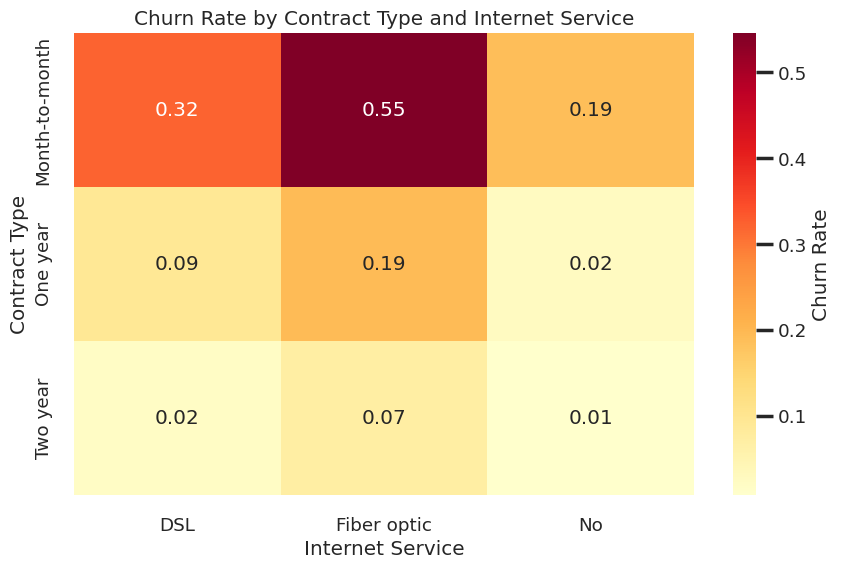

<ipython-input-43-dc7b16d9912f>:31: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot2 = pd.pivot_table(data,


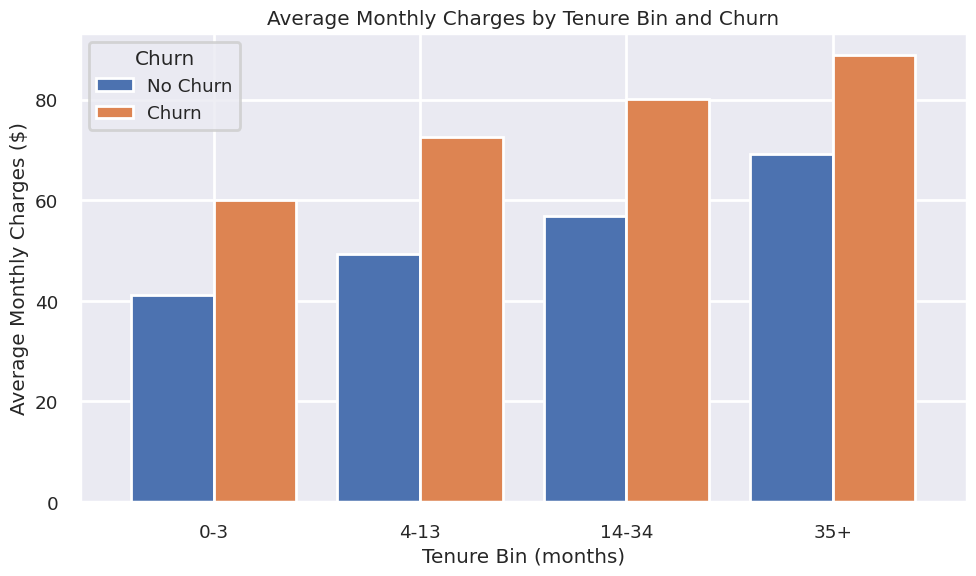

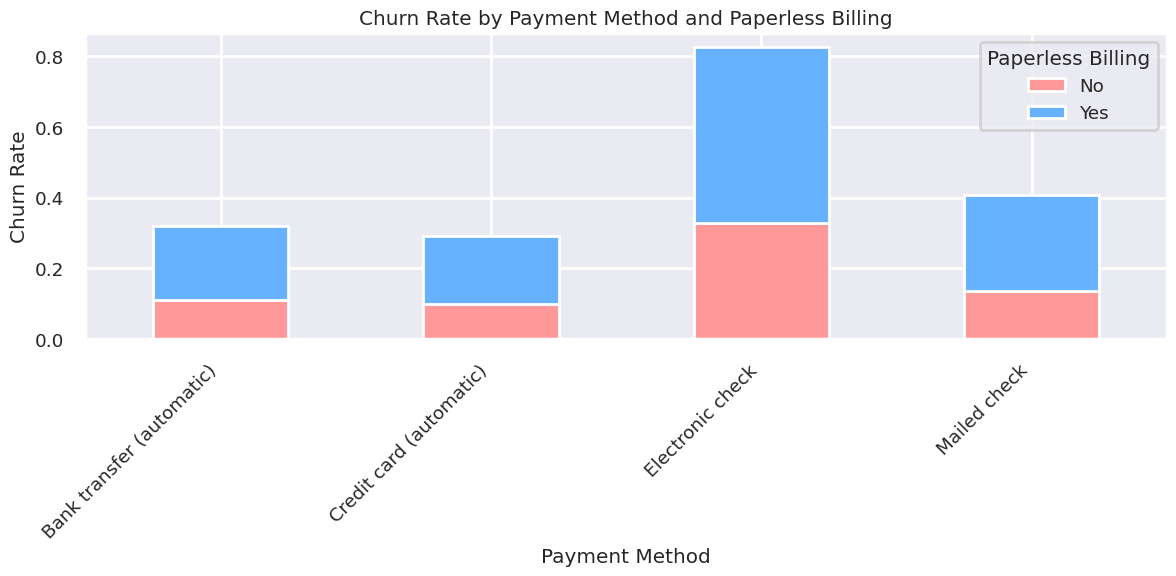

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (assuming the file path is correct)
data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Ensure Churn is numeric (0/1) for calculations
data['Churn'] = data['Churn'].map({'No': 0, 'Yes': 1})

# Pivot Table 1: Churn Rate by Contract Type and Internet Service
pivot1 = pd.pivot_table(data,
                        index='Contract',
                        columns='InternetService',
                        values='Churn',
                        aggfunc='mean')  # Mean gives churn rate (proportion of Yes)

# Chart 1: Heatmap for Churn Rate
plt.figure(figsize=(10, 6))
sns.heatmap(pivot1, annot=True, fmt='.2f', cmap='YlOrRd', cbar_kws={'label': 'Churn Rate'})
plt.title('Churn Rate by Contract Type and Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Contract Type')
plt.show()

# Pivot Table 2: Average Monthly Charges and Churn by Tenure Bins
# Create tenure bins
bins = [0, 3, 13, 34, float('inf')]
labels = ['0-3', '4-13', '14-34', '35+']
data['TenureBin'] = pd.cut(data['tenure'], bins=bins, labels=labels, right=False)
pivot2 = pd.pivot_table(data,
                        index='TenureBin',
                        columns='Churn',
                        values='MonthlyCharges',
                        aggfunc='mean')

# Chart 2: Grouped Bar Chart for Average Monthly Charges
pivot2.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title('Average Monthly Charges by Tenure Bin and Churn')
plt.xlabel('Tenure Bin (months)')
plt.ylabel('Average Monthly Charges ($)')
plt.xticks(rotation=0)
plt.legend(['No Churn', 'Churn'], title='Churn')
plt.tight_layout()
plt.show()

# Pivot Table 3: Churn by Payment Method and Paperless Billing
pivot3 = pd.pivot_table(data,
                        index='PaymentMethod',
                        columns='PaperlessBilling',
                        values='Churn',
                        aggfunc='mean')  # Mean gives churn rate

# Chart 3: Stacked Bar Chart for Churn Rate
pivot3.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#FF9999', '#66B2FF'])
plt.title('Churn Rate by Payment Method and Paperless Billing')
plt.xlabel('Payment Method')
plt.ylabel('Churn Rate')
plt.legend(['No', 'Yes'], title='Paperless Billing', loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()